# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


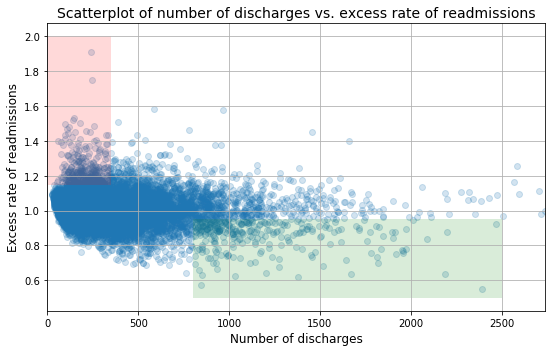

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### The dataset

In [6]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


#### We are interested in the hospitals with *'Excess Readmission Ratio' > 0*

* **About hospitals with *'Excess Readminision Ratio' > 0***

In [7]:
tot_hosp_valid = clean_hospital_read_df.loc[clean_hospital_read_df['Excess Readmission Ratio'] > 0]['Hospital Name'].count()
excess_read_ratio_max  = clean_hospital_read_df['Excess Readmission Ratio'].max()
excess_read_ratio_min  = clean_hospital_read_df['Excess Readmission Ratio'].min()
excess_read_ratio_mean = clean_hospital_read_df['Excess Readmission Ratio'].mean()
ranges = [0, 1, 2]
h1, h2 = clean_hospital_read_df['Excess Readmission Ratio'].groupby(pd.cut(clean_hospital_read_df['Excess Readmission Ratio'], ranges)).count()

print("+---------------------------------------------------|---------------+")
print("| Total hospitals with excess readmission ratio > 0 | %s        |" %(format(tot_hosp_valid, ',')))
print("|---------------------------------------------------|---------------|")
print("| Excess readimission ratio:                    max | %.2f          |" % excess_read_ratio_max)
print("|                                               min | %.2f          |" % excess_read_ratio_min)
print("|                                              mean | %.2f          |" % excess_read_ratio_mean)
print("|---------------------------------------------------|---------------|")
print("| Hospitals with excess readmission ratio <= 1      | %s (%.2f%%)|" %(format(h1, ','), (100*(h1/(h1+h2)))))
print("| Hospitals with excess readmission ratio > 1 & <=2 | %s (%.2f%%)|" %(format(h2, ','), (100*(h2/(h1+h2)))))
print("+---------------------------------------------------|---------------+")
print(format(tot_hosp_valid, ','))

+---------------------------------------------------|---------------+
| Total hospitals with excess readmission ratio > 0 | 11,497        |
|---------------------------------------------------|---------------|
| Excess readimission ratio:                    max | 1.91          |
|                                               min | 0.55          |
|                                              mean | 1.01          |
|---------------------------------------------------|---------------|
| Hospitals with excess readmission ratio <= 1      | 5,558 (48.34%)|
| Hospitals with excess readmission ratio > 1 & <=2 | 5,939 (51.66%)|
+---------------------------------------------------|---------------+
11,497


### 'Excess Readmission Ratio' in hospitals with number of discharges < 100 

In [8]:
tot_h100 = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges'] < 100].count()
med_h100 = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges'] < 100].mean()
tot_h100_exc_gt_one = clean_hospital_read_df['Hospital Name'].loc[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Excess Readmission Ratio'] > 1)].count()
print("+---------------------------------------------------+--------------+")
print("| Hospitals with discharges < 100          Total    |   %s      |" %(format(tot_h100,',')))
print("|                                           Mean    |   %.3f      |" %med_h100)
print("|               Have excess readmission rate > 1    |   %.2f%%     |" %(100*(tot_h100_exc_gt_one/tot_h100)))
print("+---------------------------------------------------+--------------+")

+---------------------------------------------------+--------------+
| Hospitals with discharges < 100          Total    |   1,188      |
|                                           Mean    |   1.023      |
|               Have excess readmission rate > 1    |   63.22%     |
+---------------------------------------------------+--------------+


### 'Excess Readmission Ratio' in hospitals with number of discharges > 1000

In [9]:
tot_h1000 = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges'] > 1000].count()
med_h1000 = clean_hospital_read_df['Excess Readmission Ratio'].loc[clean_hospital_read_df['Number of Discharges'] > 1000].mean()
tot_h1000_exc_gt_one = clean_hospital_read_df['Hospital Name'].loc[(clean_hospital_read_df['Number of Discharges'] > 1000) & (clean_hospital_read_df['Excess Readmission Ratio'] > 1)].count()
print("+---------------------------------------------------+--------------+")
print("| Hospitals with discharges > 1000          Total   |     %d      |" %tot_h1000)
print("|                                            Mean   |   %.3f      |" %med_h1000)
print("|                Have excess readmission rate > 1   |   %.2f%%     |" %(100*(tot_h1000_exc_gt_one/tot_h1000)))
print("+---------------------------------------------------+--------------+")

+---------------------------------------------------+--------------+
| Hospitals with discharges > 1000          Total   |     463      |
|                                            Mean   |   0.978      |
|                Have excess readmission rate > 1   |   44.49%     |
+---------------------------------------------------+--------------+


### How to find out if there is a correlation between hospital capacity (number of discharges) and readmission rates.

In [10]:
from scipy.stats import pearsonr

In [11]:
df_temp = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()

In [12]:
df_temp.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


### Pearson correlation
"*The **Pearson correlation coefficient measures the linear relationship between two datasets**. ... Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. **Positive correlations imply that as x increases, so does y**. **Negative correlations imply that as x increases, y decreases**.*".<br> Source: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html 

### Number of Discharges versus Excess Readmission Ratio

#### A - All hospitals

In [13]:
pearson_corr = pearsonr(df_temp[['Number of Discharges']], df_temp[['Excess Readmission Ratio']])[0][0]
pearsonr(df_temp[['Number of Discharges']], df_temp[['Excess Readmission Ratio']])
print("+----------------------------------------------------------+")
print("| 'Number of Discharges' versus 'Excess Readmission Ratio' |")
print("| for all hospitals:                                       |") 
print("| => Pearson Correlation = %.4f                         |" %pearson_corr)
print("+----------------------------------------------------------+")

+----------------------------------------------------------+
| 'Number of Discharges' versus 'Excess Readmission Ratio' |
| for all hospitals:                                       |
| => Pearson Correlation = -0.0974                         |
+----------------------------------------------------------+


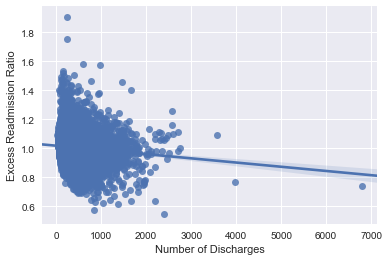

In [14]:
sns.set(color_codes=True)
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df_temp)

#### B - Hospitals with discharges < 100

In [15]:
df_temp_dischg100 = df_temp.loc[df_temp['Number of Discharges'] < 100]
pearson_corr = pearsonr(df_temp_dischg100[['Number of Discharges']], df_temp_dischg100[['Excess Readmission Ratio']])[0][0]
pearsonr(df_temp_dischg100[['Number of Discharges']], df_temp_dischg100[['Excess Readmission Ratio']])
print("+----------------------------------------------------------+")
print("| 'Number of Discharges' versus 'Excess Readmission Ratio' |")
print("| for hospitals with discharges < 100:                     |") 
print("| => Pearson Correlation = %.4f                         |" %pearson_corr)
print("+----------------------------------------------------------+")

+----------------------------------------------------------+
| 'Number of Discharges' versus 'Excess Readmission Ratio' |
| for hospitals with discharges < 100:                     |
| => Pearson Correlation = -0.2446                         |
+----------------------------------------------------------+


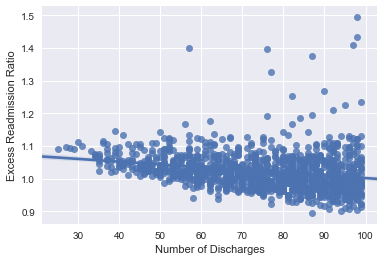

In [16]:
df_dischg_lt100 = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].loc[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Excess Readmission Ratio'] > 0)]
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df_dischg_lt100)

#### C - Hospitals with discharges > 1,000

In [17]:
df_temp_dischg1000 = df_temp.loc[df_temp['Number of Discharges'] > 1000]
pearson_corr = pearsonr(df_temp_dischg1000[['Number of Discharges']], df_temp_dischg1000[['Excess Readmission Ratio']])[0][0]
pearsonr(df_temp_dischg1000[['Number of Discharges']], df_temp_dischg1000[['Excess Readmission Ratio']])
print("+----------------------------------------------------------+")
print("| 'Number of Discharges' versus 'Excess Readmission Ratio' |")
print("| for hospitals with discharges > 1000:                    |") 
print("| => Pearson Correlation = %.4f                         |" %pearson_corr)
print("+----------------------------------------------------------+")

+----------------------------------------------------------+
| 'Number of Discharges' versus 'Excess Readmission Ratio' |
| for hospitals with discharges > 1000:                    |
| => Pearson Correlation = -0.0793                         |
+----------------------------------------------------------+


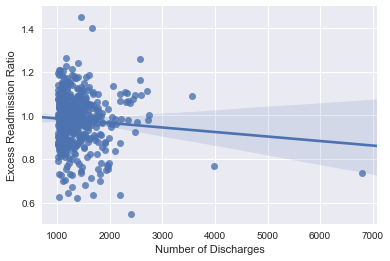

In [18]:
df_dischg_gt1000 = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].loc[(clean_hospital_read_df['Number of Discharges'] > 1000) & (clean_hospital_read_df['Excess Readmission Ratio'] > 0)]
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df_dischg_gt1000)

#### D - What about hospitals with discharges between 100 and 1,000 (inclusive)?

In [19]:
df_temp2 = df_temp.loc[(df_temp['Number of Discharges'] >= 100) & (df_temp['Number of Discharges'] <= 1000)]
pearson_corr = pearsonr(df_temp2[['Number of Discharges']], df_temp2[['Excess Readmission Ratio']])[0][0]
pearsonr(df_temp2[['Number of Discharges']], df_temp2[['Excess Readmission Ratio']])
print("+----------------------------------------------------------+")
print("| 'Number of Discharges' versus 'Excess Readmission Ratio' |")
print("| for hospitals with discharges >= 100 and <= 1,000:       |") 
print("| => Pearson Correlation = %.4f                         |" %pearson_corr)
print("+----------------------------------------------------------+")

+----------------------------------------------------------+
| 'Number of Discharges' versus 'Excess Readmission Ratio' |
| for hospitals with discharges >= 100 and <= 1,000:       |
| => Pearson Correlation = -0.0559                         |
+----------------------------------------------------------+


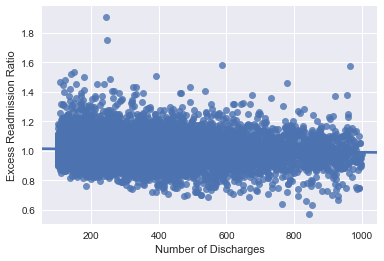

In [20]:
df_dischg_medium = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].loc[(clean_hospital_read_df['Number of Discharges'] >= 100) & (clean_hospital_read_df['Number of Discharges'] <= 1000) & (clean_hospital_read_df['Excess Readmission Ratio'] > 0)]
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df_dischg_medium)

### A. Do you agree with the above analysis and recommendations? Why or why not?

**No**. Although we can find a great excess rate of readmission (>1.0) in hospitals with low number of discharges, we see also many occurences of low rate of readmissions (<1.0) in hospitals with similar number of discharges.

For me, it is not clear that there a correlation between number of discharges and rate of readmissions.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

**1. Setup an appropriate hypothesis test.**

**2. Compute and report the observed significance value (or p-value).**

**3. Report statistical significance for  αα  = .01.**

**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

**5. Look at the scatterplot above.**

* What are the advantages and disadvantages of using this plot to convey information?

* Construct another plot that conveys the same information in a more direct manner.